<a href="https://colab.research.google.com/github/shantanu1singh/ml-practice/blob/master/collab/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


## Converting reviews to a vector of the same size 10000

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))        
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          
    return results

x_train = vectorize_sequences(train_data)                  
x_test = vectorize_sequences(test_data)     

# Another way to handle labels and loss
# - Integer encode the labels to integer tensor
# - Use sparse_categorical_crossentropy instead of categorical_crossentropy as loss function

## One hot encoding labels

In [4]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)        
one_hot_test_labels = to_one_hot(test_labels) 

# Another way to run onehot encoding
# from keras.utils.np_utils import to_categorical

# one_hot_train_labels = to_categorical(train_labels)
# one_hot_test_labels = to_categorical(test_labels)

## Build model

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,))) # Using 64 dimensional intermediate layers as there are 46 classes. If 16 dimensional layers were chosen, we have a risk of the layers dropping information 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Setting aside validation data

In [7]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

## Run model

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.7240 - accuracy: 0.5197 - val_loss: 1.8282 - val_accuracy: 0.6290
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4613 - accuracy: 0.7103 - val_loss: 1.3143 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0623 - accuracy: 0.7762 - val_loss: 1.1139 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8297 - accuracy: 0.8266 - val_loss: 1.0200 - val_accuracy: 0.7790
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6574 - accuracy: 0.8662 - val_loss: 0.9528 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5214 - accuracy: 0.8955 - val_loss: 0.9090 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 1s 43ms/step - loss: 0.4181 - accuracy: 0.9186 - val_loss: 0.9207 - val_accuracy: 0.8070
Epoch 8/20
16

## Plotting loss

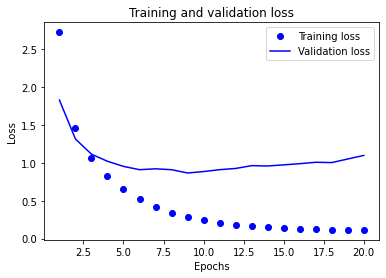

In [9]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Plotting accuracy

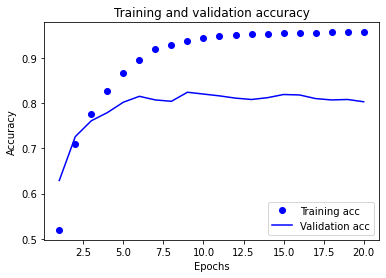

In [12]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Since overfitting is seen to occur after 9 epochs, run model again with 9 epochs only

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 52ms/step - loss: 2.5833 - accuracy: 0.5360 - val_loss: 1.6873 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 45ms/step - loss: 1.3841 - accuracy: 0.7146 - val_loss: 1.2960 - val_accuracy: 0.7160
Epoch 3/9
16/16 [==============================] - 1s 42ms/step - loss: 1.0494 - accuracy: 0.7720 - val_loss: 1.1460 - val_accuracy: 0.7370
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8392 - accuracy: 0.8172 - val_loss: 1.0346 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6782 - accuracy: 0.8527 - val_loss: 0.9871 - val_accuracy: 0.7870
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5480 - accuracy: 0.8830 - val_loss: 0.9317 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 1s 43ms/step - loss: 0.4425 - accuracy: 0.9059 - val_loss: 0.9140 - val_accuracy: 0.8060
Epoch 8/9
16/16 [===

## Comparison against random selection

In [14]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18388245770258238

## Predict 

In [16]:
predictions = model.predict(x_test)
predictions

array([[3.6040707e-05, 1.9887573e-05, 8.8164506e-06, ..., 2.7164248e-05,
        2.0472527e-05, 2.5347344e-06],
       [7.6758838e-03, 1.6990779e-01, 3.0560114e-03, ..., 3.9356877e-03,
        5.4361894e-06, 1.7498967e-05],
       [2.0252250e-02, 7.0987666e-01, 8.1476057e-03, ..., 3.9574695e-03,
        2.3656122e-04, 3.5039621e-04],
       ...,
       [1.8435459e-05, 1.6683123e-05, 1.0549827e-05, ..., 1.5769961e-05,
        7.5912045e-05, 5.8895121e-06],
       [1.9067611e-03, 5.1697128e-02, 9.1594700e-03, ..., 1.8408034e-03,
        9.2881423e-04, 4.3453943e-04],
       [1.4416997e-03, 4.4252032e-01, 2.1870947e-02, ..., 1.5186458e-03,
        8.9438108e-05, 7.3560594e-05]], dtype=float32)